## The University of Melbourne, School of Computing and Information Systems
# COMP90049 Introduction to Machine Learning, 2020 Semester 2
-----
## Project 1: Predicting stroke with Naive Bayes and K-NN
-----
###### Student Name(s): YuanHung, Lin
###### Python version: 3.8
###### Submission deadline: 

This iPython notebook is a template which you will use for your Project 1 submission. 

Marking will be applied on the functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 

In [274]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
pd.options.mode.chained_assignment = None
%matplotlib inline

## Questions (you may respond in a cell or cells below):

You should respond to questions 1-4. In question 2 (b) you can choose between two options. A response to a question should take about 100--200 words, and make reference to the data wherever possible.

### Question 1: Data exploration

- a) Explore the data and summarise different aspects of the data. Can you see any interesting characteristic in features, classes or categories? What is the main issue with the data? Considering the issue, how would the Naive Bayes classifier work on this data? Discuss your answer based on the Naive Bayes' formulation.
- b) Is accuracy an appropriate metric to evaluate the models created for this data? Justify your answer. Explain which metric(s) would be more appropriate, and contrast their utility against accuracy. [no programming required]


#### Answer 1 (a):
    

In this case, the interesting thing is there are some features that we have no idea if they might cause some effect to stroke or not, such as "work_type" and "ever_married". However, the distribution of data might be another issue because the previous 80% of original data are all with class stroke = 0, and only the last 20% of data are with class stroke = 1. It might be a problem when we try to learn from our dataset since many machine learning models are subject to a frequency bias in which they place more emphasis on learning from data observations which occur more commonly.

In terms of Naive Bayes classifier, it's a supervised machine learning skill that we are given a set of test instances to predict their most likely class values from our training model which is based on Bayes's Rule. Based on Bayes' Rule formula, we try to figure out maximum possibility from each class based on P(xi|y=k)P(y=k). There are two ways to represent Naive Bayes classifiers, one is Gaussian Naive Bayes which given instance x is numeric, another is Categorical Naive Bayes which given instance x is not numeric.

#### Answer 1 (b):

As we know that Accuracy is based on (TP+TN)/(TP+FP+TN+FN), and Precision is based on TP/(TP+FP), which means how often are we correct when we predict that an instance is interesting. On the other hand, Recall is based on TP/(TP+FN), which means what proportion of the truly interesting instances have we correctly identified as interesting. 

In terms of predicting a certain patient if he/she has a stroke or not, we consider more about Recall rate rather than Accuracy. First reason is that we really care about a patient (tester) who actually has a stroke (or we say that most likely to have a stroke) can be identified into an accurate position or not. Another reason is that this dataset is imbalanced since almost 80% of instances with label Y = 0 (No stroke), and if we keep chasing on higher accuracy, our machine learning model would cause some bias on label Y = 0.

### Question 2: Naive Bayes concepts and formulation

- a) Explain the independence assumption underlying Naive Bayes. What are the advantages and disadvantages of this assumption? Elaborate your answers using the features of the provided data. [no programming required]
- b) Implement the Naive Bayes classifier. You need to decide how you are going to apply Naive Bayes for nominal and numeric attributes. You can combine both Gaussian and Categorical Naive Bayes (option 1) or just using Categorical Naive Bayes (option 2). Explain your decision. For Categorical Naive Bayes, you can choose either epsilon or Laplace smoothing for this calculation. Evaluate the classifier using accuracy and appropriate metric(s) on test data. Explain your observations on how the classifiers have performed based on the metric(s). Discuss the performance of the classifiers in comparison with the Zero-R baseline.
- c) Explain the difference between epsilon and Laplace smoothing. [no programming required]

#### Answer 2 (a):

There are three assumptions underlying Naive Bayes:
1. Features of an instance are conditionally independent given the class
2. Instances are independent of each other
3. The distribution of data in the training instances is the same as the distribution of data in the test instances

Based on these three assumptions, the advantage is that we can easily compute Naive Bayes formula with a more feasible solution, and it could be implemented in a simple way. On the other hand, I think there are two disadvantages based on these assumptions. One is, it is not always the case that features of an instance are conditionally independent given the class. For example, there might be some relationship between features like "age", "hypertension", "heart_disease" and "smoking_status", and we could not intuitively set them conditionally independent. Another disadvantage is that some testers (instances) might have some relationship, for instance, if some data comes from a family and one of smoking_status shows smoke and others' show never smoked, but they indeed live in the same house. It might influence our prediction.

#### Answer 2 (b):

In this project, I decided to use Categorical Naive Bayes for numeric attributes ("avg_glucose_level", "age" and "bmi"). The first reason is that I can easily distinguish these attributes values into different sections since the distribution is not so weird (as below figure). The second reason is that, in age attributes, it's more reasonable to divide data into children, adults and elders which is more acceptable based on medical science.

As mentioned above, I tried to <font color= deepred>**shuffle**</font> all dataset in the beginning so that the distribution of training and testing data would be more normalized.

Regarding the smoothing method, I tried to use Laplace Smoothing since it can make our data more smooth and normalized.
***
<font color= navy>**Code of Navie Bayes Classifier** **:**</font>
<font color= navy>(Discussion is in below)</font>

In [235]:
#preprocessing data from a file, and store in X_df and Y_df
f = open("stroke_update.csv","r")
features = f.readline().strip().split(",")
X_features = features[:-1]
Y_features = features[-1]

Z = []
for line in f.readlines():
    line = line.strip().split(",")
    Z.append(line)
Z_df = pd.DataFrame(Z, columns=features)
Z = Z_df.values.tolist()

## The strategy I choose to use is to shuffle whole data because the distribution of data is a little bit weird
## (previous 80% data with class 0 and the last 20% with class 1)
np.random.seed(3)
np.random.shuffle(Z)
## after shuffling data, I split data into featrues and class
Z_df = pd.DataFrame(Z, columns=features)
Y_df = Z_df["stroke"]
X_df = Z_df.drop("stroke", axis=1)
f.close()

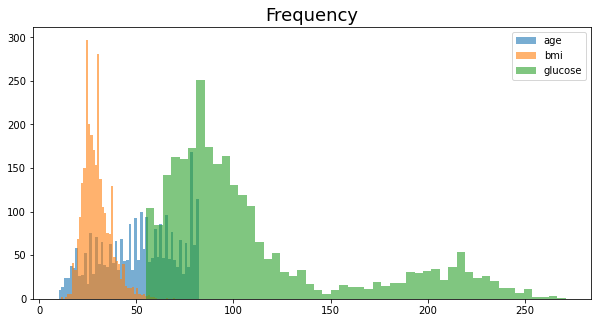

In [236]:
# visualize numeric features and observe their distribution
agedata = Z_df["age"]
glucose = Z_df["avg_glucose_level"]
bmi = Z_df["bmi"]
age_data, glucose_data, bmi_data = [], [], []
for i in range(0,2740):
    a = int(agedata[i])
    b = int(float(glucose[i]))
    c = int(float(bmi[i]))
    age_data.append(a)
    glucose_data.append(b)
    bmi_data.append(c)
age_data = np.array(age_data)
glucose_data = np.array(glucose_data)
bmi_data = np.array(bmi_data)
plt.figure(figsize=(10,5))
plt.hist(age_data, bins=50, alpha = 0.6, label="age")
plt.hist(bmi_data, bins=50, alpha = 0.6, label="bmi")
plt.hist(glucose_data, bins=50, alpha = 0.6, label="glucose")
plt.title(label = "Frequency", fontsize = 18)
plt.legend(loc = "upper right")
plt.show()

In [237]:
# This function should transform data into a usable format 

## Transfer numeric attributes to nomial and map string values to integers for categorical attributes

# avg_glucose_level : from 55.01 to 271.74 -> ['High', 'Low', 'very High', 'very Low'] -> [0,1,2,3]
# bmi : from 11.0 to 70.3 -> ['High', 'Low', 'very High', 'very Low'] -> [0,1,2,3]
# age : from 10.0 to 82.0 -> ['adult'(18~50), 'elder'(>50), 'young'(<18)]
# Gender : ['Female', 'Male'] -> [0, 1]
# hypertension : ['0', '1']
# heart_disease : ['0', '1']
# ever_married : ['No', 'Yes'] -> [0, 1]
# work_type : ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'] -> [0, 1, 2, 3, 4]
# Residence_type : ['Rural', 'Urban'] -> [0, 1]
# smoking_status : ['formerly smoked', 'never smoked', 'smokes'] -> [0, 1, 2]
def preprocess(X_df):
    X_df_copy = X_df.copy()
    for c in list(X_df_copy):
        if (c == "avg_glucose_level") or(c == "bmi"):
            for i in range(2740):
                X_df_copy[c][i] = int(float(X_df_copy[c][i]))
            X_df_copy[c] = pd.cut(X_df_copy[c], bins=4, labels = ["very Low", "Low", "High", "very High"])
        if(c == "age"):
            for i in range(2740):
                val = int(float(X_df_copy[c][i]))
                if val < 18:
                    X_df_copy[c][i] = "young"
                if (val >= 18)and(val <= 50):
                    X_df_copy[c][i] = "adult"
                if val > 50 :
                    X_df_copy[c][i] = "elder"
        vals = sorted(set([v for v in X_df_copy[c].values]))
        vals_dict = dict(zip(vals, range(len(vals))))
        X_df_copy[c] = X_df_copy[c].map(lambda s: vals_dict.get(s) if s in vals_dict else s)
    return X_df_copy

In [238]:
X_df_after = preprocess(X_df)

In [240]:
# This function should split a data set into a training set and hold-out test set
# split data into 85-15
# return type : list
def split_data(X_df):
    size = X_df.shape[0]
    train_size = int(size * 0.85)
    X_df_train = X_df[:train_size].values.tolist()
    X_df_test = X_df[train_size:].values.tolist()
    return X_df_train, X_df_test

In [241]:
X_train, X_test = split_data(X_df_after)

In [242]:
# split Y-class into the same size and order as X-features
Y_after = []
Y = Y_df.values.tolist()
for i in range(0, len(Y)):
    if Y[i] == "0":
        Y_after.append(0)
    else:
        Y_after.append(1)
Y_train = Y_after[:int(len(Y_after)*0.85)]
Y_test = Y_after[int(len(Y_after)*0.85):]

In [243]:
# This function should build a supervised NB model
# Function for counting the frequency of classes to claculate prior probability p(y=i) = n(i)/N
# input type : list
def train_p_y(y):
    class_priors = [0]*len(set(y))
    for c in y:
        class_priors[c]+=1    
    return class_priors

In [244]:
train_p_y(Y_train)

[1872, 457]

In [245]:
# This function should build a supervised NB model
# # Function for likelihood p(x=j|y=i) = n(i,j)/n(i)
# input type : list
def train_p_xy(x,y):
    
    # init dict (over classes) of dict (over features) of dict (over value counts)
    outdict = {c:{} for c in y}
    for d in outdict.keys():
        for f in range(len(x[0])):
            outdict[d][f]={}
            rng = sorted(set([i[f] for i in x]))
            outdict[d][f] = {v:0 for v in rng}
    
      
    # fill dict with counts , go through every instances
    for idx,_ in enumerate(x):   # ,_ ignore the variable, enumerate func just return index
        for fidx, _ in enumerate(x[idx]):
            outdict[y[idx]][fidx][x[idx][fidx]]+=1

           
    # normalize, using Laplace Smoothing
    for cl in outdict.keys():
        for f in outdict[cl].keys():
            for val in outdict[cl][f]:
#                 if outdict[cl][f][val] > 0:
#                     outdict[cl][f][val] = outdict[cl][f][val] / train_p_y(y)[cl]
                outdict[cl][f][val] = (outdict[cl][f][val] + 1) / (train_p_y(y)[cl] + len(outdict[cl][f]))
            
    return outdict

In [246]:
# This function should predict the class for an instance or a set of instances, based on a trained model 
def predict(x, pc, pxc):       # pc = train_p_y  pxc = train_p_xy
    # multiply prior and independent likelihood terms
    class_probs = []
    for y in range(len(pc)):
        class_prob=pc[y]/sum(pc)    # p(y=yi)
        for fidx, f in enumerate(x):
            if f in pxc[y][fidx]:
                class_prob = class_prob * pxc[y][fidx][f]    #p(y=yi)*p(xi|yi) 
        class_probs.append(class_prob)
    return class_probs, np.argmax([class_probs])

In [247]:
py = train_p_y(Y_train)
pxy = train_p_xy(X_train, Y_train)

In [248]:
# This function should evaluate a set of predictions in terms of metrics
def evaluate(pred,true):
    CM = metrics.confusion_matrix(true, pred) # Confusion Matrix
    Acc = metrics.accuracy_score(true, pred) # Accuracy
    precf1 = metrics.precision_recall_fscore_support(true, pred) # Precision, Recall and F1-score
    return CM, Acc, precf1

In [260]:
# Create Zero-Rule 
baseline_preds = [0]*len(Y_test)    # as we know that the most common class is 0
CM_baseline, Acc_baseline, precf1_baseline = evaluate(baseline_preds, Y_test)
print("Baseline accuracy by sklearn.metric: {}".format(Acc_baseline))
print("Baseline Recall by sklearn.metric: {}".format(precf1_baseline[1]))

Baseline accuracy by sklearn.metric: 0.7785888077858881
Baseline Recall by sklearn.metric: [1. 0.]


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [261]:
# Our Naive Bayes Classifier evaluation
correct = 0
preds = []
for i in range(len(X_test)):
    prediction = predict(X_test[i], py, pxy)[1]
    correct = correct + int(prediction==Y_test[i])    # true = 1 false = 0
    preds.append(prediction)
CM, Acc, precf1 = evaluate(preds, Y_test)

print("Confusion Matrix:\n{}\naccuracy: {}\naccuracy by sklearn.metric: {}\nprecision: {}\nrecall: {}\nF1: {}".format(CM,
                                                correct / len(X_test), 
                                                Acc,
                                                precf1[0],
                                                precf1[1],
                                                precf1[2]))

# second amount in precision, recall and F1 array are reverse positive to 1 negative to 0 
# which means TP is predict 1 and truly 1, FN is predict 0 but is 1

Confusion Matrix:
[[290  30]
 [ 49  42]]
accuracy: 0.8077858880778589
accuracy by sklearn.metric: 0.8077858880778589
precision: [0.85545723 0.58333333]
recall: [0.90625    0.46153846]
F1: [0.8801214  0.51533742]


After evaluating by evaluation metrics, the accuracy of our Naive Bayes classifier is almost 3% more than the accuracy of Zero-Rule. However, its Recall rate is better than Zero-Rule's (which is 0 because we predict every test data with label Y = 0 which means no one has a stroke). However, we should consider more about Recall rate in this specific project because as a medical-prone classifier (prediction), it is more important if we can correctly predict a certain tester who has more chance to have stroke in future or actually have stroke now. So far, the Recall rate is far lower than accuracy, it seems that there might be some issues in this specific dataset or our classify method. I guess that we could consider more about the quality of training data and maybe find new or better features could help, but that can be hard or expensive work.

#### Answer 2 (c):

In Epsilon, we replace 0 with a very small constant ε if we calculate P( xi | y ) = 0 while ε needs to be much smaller than 1 / N because we don't want the probability of this feature that we don't find in training is larger than the probability of some features that we find in training once. In Laplace smoothing, we add a pseudocount α to each feature count observed during training.

The difference is that we only adjust the maximum likelihood estimator which is 0 in Epsilon, but in Laplace, we no longer have a true maximum likelihood estimator and it may add bias to our NB classifier. Another difference is that we calculate the frequency of ε when we meet 0 in Epsilon method which can not represent the actual probability of that certain feature. While in Laplace smoothing, we add pseudocount to avoid this problem (Probabilities are changed drastically when there are few instances, but with a large number of instances, the changes are small) and it reduces variance as well.

### Question 3: Model Comparison
- a) Implement the K-NN classifier, and find the optimal value for K. 
- b) Based on the obtained value for K in question 4 (a), evaluate the classifier using accuracy and chosen metric(s) on test data. Explain your observations on how the classifiers have performed based on the metric(s). Discuss the performance of the classifiers in comparison with the Zero-R baseline.
- c) Is K-NN sensitive to imbalanced data? Justify your answer. [no programming required]
- d) Compare the classifiers (Naive Bayes and K-NN) based on metrics' results. Provide a comparatory discussion on the results. [no programming required]

#### Answer 3 (a):

<font color= navy>**Code of KNN Classifier and find the optimal value for K** **:**</font>

First, I have to define what is the meaning of optimal value for K, and based on this project, I think the more important thing is to correctly predict a potential tester (which means has a stroke or high chance to have in the future) with label Y = 0. 

As mentioned, I tried to find a highest Recall rate in different K values in a reasonable range.

Maximum Recall rate at K =  1


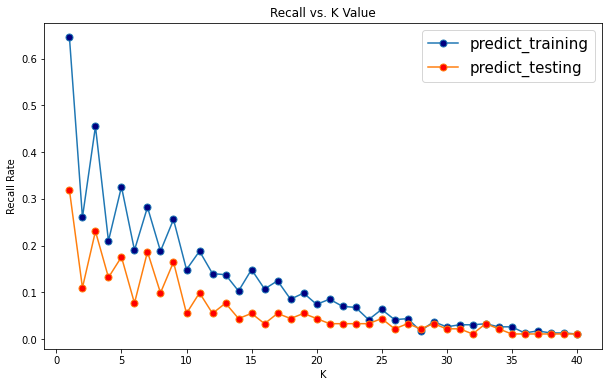

In [278]:
# K-NN implementation - Find optimal K value 
from sklearn.neighbors import KNeighborsClassifier
# try to find out higher Recall rate in both training and testing data
recall_train = []
recall_test = []
# for K value in 1 ~ 40 is just a magic value of boundary
for i in range(1, 41):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, Y_train)
    preds_test = classifier.predict(X_test)
    preds_train = classifier.predict(X_train)
    CM, Acc, precf1 = evaluate(preds_train, Y_train)
    recall_train.append(precf1[1][1])
    CM, Acc, precf1 = evaluate(preds_test, Y_test)
    recall_test.append(precf1[1][1])
plt.figure(figsize=(10,6))
plt.plot(range(1,41),recall_train, marker='o',markerfacecolor='navy', markersize=7, label="predict_training")
plt.plot(range(1,41),recall_test, marker='o',markerfacecolor='red', markersize=7, label="predict_testing")
plt.legend(loc="upper right", fontsize = 15)
plt.title('Recall vs. K Value')
plt.xlabel('K')
plt.ylabel('Recall Rate')
print("Maximum Recall rate at K = ",recall_test.index(max(recall_test))+1)

In [279]:
# build training function of KNN with K=1
def train_knn(x,y):
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(x,y)
    return classifier

In [280]:
# build predict function of KNN with K=1
def predict_knn(classifier, x):
    preds_knn = classifier.predict(x)
    return preds_knn

In [284]:
classifier = train_knn(X_train,Y_train)
preds_knn = predict_knn(classifier, X_test)
CM, Acc, precf1 = evaluate(preds_knn, Y_test)
print("Confusion Matrix:\n{}\naccuracy: {}\nprecision: {}\nrecall: {}\nF1: {}".format(CM, 
                                                Acc,
                                                precf1[0],
                                                precf1[1],
                                                precf1[2]))

Confusion Matrix:
[[272  48]
 [ 62  29]]
accuracy: 0.732360097323601
precision: [0.81437126 0.37662338]
recall: [0.85       0.31868132]
F1: [0.83180428 0.3452381 ]


#### Answer 3 (b):

In this case with KNN classifier, I found that the accuracy of KNN classifier is smaller than Zero-Rule, and the reason is that I chose K value based on higher Recall rate. However, when we look at the confusion Matrix and evaluation metrics above, I discover that the precision rate and recall rate are good if we take y = 0 (which represents no stoke) into account, but it's not good enough when we are interested in "have stroke" (y = 1). 

Regarding to this result, we should consider more about our dataset, which means KNN and NB classifier may not be appropriate enough to predict recall rate based on y = 1 ("have stroke") when we have an imbalanced dataset (80% of data shows "No stroke" which is majority class)or the relationships between each features and class are much more complicated.

#### Answer 3 (c):

In terms of KNN, I think it is sensitive to imbalanced data because KNN classifier is able to find the K nearest neighbours to predict its label. According to imbalanced data, the majority class (in this project which is Y = 0, no stroke) would be predicted since our K-nearest neighbours are almost that majority class, and it may cause similar results as I made in Naive Bayes classifier.

#### Answer 3 (d):

In the results metrics between KNN and Naive Bayes classifier, Accuracy, Precision and Recall of NB are higher than KNN. I think the reason is that NB takes a maximum likelihood estimation route and generates probabilities for each class. In NB, the classifier also calculates probability estimates for the newly occurring instances which means learns over time. On the other hand, KNN classifiers might be more overfitting due to finding too much similarity to the dataset if we choose some optimal value of K. However, in the above result from my solution, I choose K=1 because of higher Recall, and it might probably cause lower performance on other evaluation metrics.